In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv('C:/Users/16318/Desktop/Programs and CodeAcademy/Data Analysis/Python/Titanic Set/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

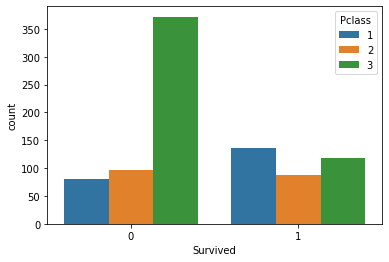

In [5]:
sns.countplot(x='Survived', data=train, hue = 'Pclass')

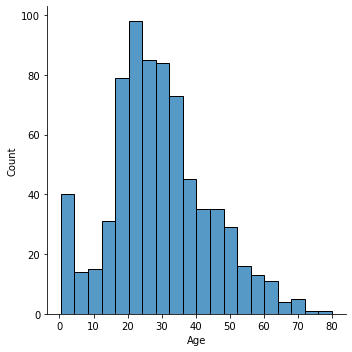

In [6]:
sns.displot(train['Age'])

The average age for Pclass 1 is: 38
The average age for Pclass 2 is: 30
The average age for Pclass 3 is: 25


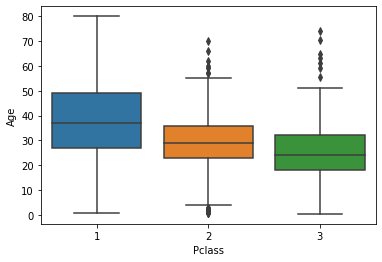

In [7]:
sns.boxplot(x='Pclass', y='Age', data=train)
print('The average age for Pclass 1 is:',round(train[train['Pclass'] == 1]['Age'].mean()))
print('The average age for Pclass 2 is:',round(train[train['Pclass'] == 2]['Age'].mean()))
print('The average age for Pclass 3 is:',round(train[train['Pclass'] == 3]['Age'].mean()))

In [8]:
def fill_in_na_values(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return round(train[train['Pclass'] == 1]['Age'].mean())
        elif Pclass == 2:
            return round(train[train['Pclass'] == 2]['Age'].mean())
        elif Pclass == 3:
            return round(train[train['Pclass'] == 3]['Age'].mean())
    else:
        return Age
train['Age'] = train[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

<AxesSubplot:>

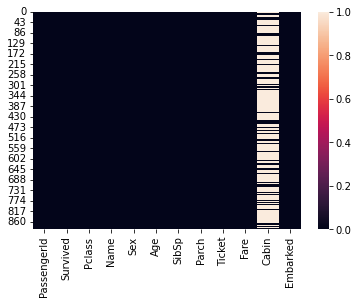

In [9]:
sns.heatmap(train.isnull())

In [10]:
train.drop(['Cabin'], axis=1, inplace=True)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
train.dropna(inplace=True)

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
#One Hot Encoder for Categorical Variables
print(train['Sex'].unique())
print(train['Embarked'].unique())
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

['male' 'female']
['S' 'C' 'Q']


In [16]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train, sex, embarked], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        65
           1       0.78      0.58      0.67        24

    accuracy                           0.84        89
   macro avg       0.82      0.76      0.78        89
weighted avg       0.84      0.84      0.83        89

[[61  4]
 [10 14]]
0.8426966292134831


In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(accuracy_score(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        65
           1       0.62      0.75      0.68        24

    accuracy                           0.81        89
   macro avg       0.76      0.79      0.77        89
weighted avg       0.82      0.81      0.81        89

[[54 11]
 [ 6 18]]
0.8089887640449438


In [19]:
error_list = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    error_list.append(np.mean(knn_predictions != y_test))
    

print('n_neighbors needed: ', np.argmin(error_list)+1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))

n_neighbors needed:  3
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.71      0.83      0.77        24

    accuracy                           0.87        89
   macro avg       0.82      0.86      0.84        89
weighted avg       0.88      0.87      0.87        89

[[57  8]
 [ 4 20]]
0.8651685393258427
